In [51]:
import konlpy
import pandas as pd
import numpy as np 
import re

In [52]:
df = pd.read_csv('data/인스타해시태그_집밥.csv')

In [53]:
df.head()

,dates,tags
0,2021-08-05,"공구중,프로필상단링크클릭!.카이채칼,잡채,홈쿡,판다공구,주방용품,집밥,잡채,주방살림..."
1,2021-08-05,제이맘테이블.---------------------------------------...
2,2021-08-05,"참문어,이벤트당첨🐙오늘,문어숙회➡️,꿀맘스푸드,문어,삶은문어,동해안참문어,🐙,집밥,..."
3,2021-08-06,"홈요리그램아들이,협찬,하린이네쭈꾸미,화쭈하게,양념쭈꾸미,쭈꾸미볶음,오늘뭐먹지,간단레..."
4,2021-08-05,"집밥둘리가정식,두부조림1)두부500g,요리동영상,요리영상,레시피,밑반찬,요리스타그램..."


In [54]:
del df['dates']

In [55]:
df.head()

,tags
0,"공구중,프로필상단링크클릭!.카이채칼,잡채,홈쿡,판다공구,주방용품,집밥,잡채,주방살림..."
1,제이맘테이블.---------------------------------------...
2,"참문어,이벤트당첨🐙오늘,문어숙회➡️,꿀맘스푸드,문어,삶은문어,동해안참문어,🐙,집밥,..."
3,"홈요리그램아들이,협찬,하린이네쭈꾸미,화쭈하게,양념쭈꾸미,쭈꾸미볶음,오늘뭐먹지,간단레..."
4,"집밥둘리가정식,두부조림1)두부500g,요리동영상,요리영상,레시피,밑반찬,요리스타그램..."


In [56]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub(' ', str(text))
    return result

df['ko_text'] = df['tags'].apply(lambda x : text_cleaning(x))
df.head(10)

,tags,ko_text
0,"공구중,프로필상단링크클릭!.카이채칼,잡채,홈쿡,판다공구,주방용품,집밥,잡채,주방살림...",공구중 프로필상단링크클릭 카이채칼 잡채 홈쿡 판다공구 주방용품 집밥 잡채 주방살림 ...
1,제이맘테이블.---------------------------------------...,제이맘테이블 집밥을 김미정의요리담다구매 여름깍두기사과 비빔장 깍두기
2,"참문어,이벤트당첨🐙오늘,문어숙회➡️,꿀맘스푸드,문어,삶은문어,동해안참문어,🐙,집밥,...",참문어 이벤트당첨 오늘 문어숙회 꿀맘스푸드 문어 삶은문어 동해안참문어 집밥 집밥스타...
3,"홈요리그램아들이,협찬,하린이네쭈꾸미,화쭈하게,양념쭈꾸미,쭈꾸미볶음,오늘뭐먹지,간단레...",홈요리그램아들이 협찬 하린이네쭈꾸미 화쭈하게 양념쭈꾸미 쭈꾸미볶음 오늘뭐먹지 간단레...
4,"집밥둘리가정식,두부조림1)두부500g,요리동영상,요리영상,레시피,밑반찬,요리스타그램...",집밥둘리가정식 두부조림 두부 요리동영상 요리영상 레시피 밑반찬 요리스타그램 집밥 아...
5,"나라집밥,통갈비바베큐오늘은,홈캠핑신랑도,홈파티,딥스모크통갈비바베큐➰강원도,마약옥수수...",나라집밥 통갈비바베큐오늘은 홈캠핑신랑도 홈파티 딥스모크통갈비바베큐 강원도 마약옥수수...
6,"공구오픈,청귤공구,풋귤공구ㆍ지장샘농장,청귤(풋귤)준비했어요ㆍ레몬청과는",공구오픈 청귤공구 풋귤공구 지장샘농장 청귤 풋귤 준비했어요 레몬청과는
7,"찰옥수수🌽,더네이처파머스",찰옥수수 더네이처파머스
8,"목요일인친님하루,애호박새우볶음,꽈리고추무침,소고기우엉조림,멸치볶음,분홍소세지야채전입...",목요일인친님하루 애호박새우볶음 꽈리고추무침 소고기우엉조림 멸치볶음 분홍소세지야채전입...
9,"고구마순김치사실,고구마순김치,개성찬방,별미김치,여름김치,노동집약적요리,시간의음식,비...",고구마순김치사실 고구마순김치 개성찬방 별미김치 여름김치 노동집약적요리 시간의음식 비...


In [57]:
for i in range(len(df['ko_text'])):
    if len(df['ko_text'][i]) == 0:
        df = df.drop(index=i)

In [58]:
from konlpy.tag import Okt
from collections import Counter

In [91]:
stopwords = ['그램','스타','팔로워','선팔','팔로우','판매','반사','오늘','소통','맞팔','더','리그','램','홈','맛스타','집밥','하남','쿡스','맛','엄마','닭갈비','숯불','푸드']

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    #불용어 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

# 'ko_text' 피처에 적용
df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(946, 3)


,tags,ko_text,nouns
0,"공구중,프로필상단링크클릭!.카이채칼,잡채,홈쿡,판다공구,주방용품,집밥,잡채,주방살림...",공구중 프로필상단링크클릭 카이채칼 잡채 홈쿡 판다공구 주방용품 집밥 잡채 주방살림 ...,"[공구, 프로필, 상단, 링크, 클릭, 카이, 채칼, 잡채, 홈쿡, 판다, 공구, ..."
1,제이맘테이블.---------------------------------------...,제이맘테이블 집밥을 김미정의요리담다구매 여름깍두기사과 비빔장 깍두기,"[이맘, 테이블, 김미정, 요리, 구매, 여름, 깍두기, 사과, 비빔, 깍두기]"
2,"참문어,이벤트당첨🐙오늘,문어숙회➡️,꿀맘스푸드,문어,삶은문어,동해안참문어,🐙,집밥,...",참문어 이벤트당첨 오늘 문어숙회 꿀맘스푸드 문어 삶은문어 동해안참문어 집밥 집밥스타...,"[참문어, 이벤트, 당첨, 문어, 숙회, 꿀맘스, 문어, 문어, 동해안, 참문어, ..."
3,"홈요리그램아들이,협찬,하린이네쭈꾸미,화쭈하게,양념쭈꾸미,쭈꾸미볶음,오늘뭐먹지,간단레...",홈요리그램아들이 협찬 하린이네쭈꾸미 화쭈하게 양념쭈꾸미 쭈꾸미볶음 오늘뭐먹지 간단레...,"[요리, 아들, 협찬, 린, 쭈꾸미, 화쭈하, 양념, 쭈꾸미, 쭈꾸미, 볶음, 뭐,..."
4,"집밥둘리가정식,두부조림1)두부500g,요리동영상,요리영상,레시피,밑반찬,요리스타그램...",집밥둘리가정식 두부조림 두부 요리동영상 요리영상 레시피 밑반찬 요리스타그램 집밥 아...,"[둘리, 가정식, 두부, 조림, 두부, 요리, 동영상, 요리, 영상, 레시피, 밑반..."


In [92]:
# 트랜잭션 데이터 추출
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열 방지

In [93]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [94]:
from collections import Counter

count = Counter(ex_list)
count

Counter({'공구': 19,
         '프로필': 4,
         '상단': 1,
         '링크': 1,
         '클릭': 1,
         '카이': 1,
         '채칼': 3,
         '잡채': 13,
         '홈쿡': 219,
         '판다': 1,
         '주방용품': 10,
         '주방': 22,
         '살림': 27,
         '슬라이': 1,
         '미니': 5,
         '이맘': 1,
         '테이블': 100,
         '김미정': 1,
         '요리': 564,
         '구매': 4,
         '여름': 46,
         '깍두기': 7,
         '사과': 1,
         '비빔': 3,
         '참문어': 2,
         '이벤트': 12,
         '당첨': 1,
         '문어': 5,
         '숙회': 2,
         '꿀맘스': 1,
         '동해안': 1,
         '플레이': 47,
         '팅': 50,
         '집콕': 31,
         '생활': 14,
         '메뉴': 215,
         '밥상': 198,
         '아들': 25,
         '협찬': 28,
         '린': 12,
         '쭈꾸미': 20,
         '화쭈하': 1,
         '양념': 5,
         '볶음': 64,
         '뭐': 52,
         '간단': 17,
         '레시피': 73,
         '신혼': 42,
         '그릇': 36,
         '점심밥': 15,
         '가정식': 29,
         '팔': 52,
         '주부': 97

In [95]:
words = dict(count.most_common())
words

{'요리': 564,
 '맛집': 385,
 '일상': 249,
 '홈쿡': 219,
 '메뉴': 215,
 '밥상': 198,
 '점심': 158,
 '맘': 142,
 '반찬': 138,
 '식단': 121,
 '음식': 115,
 '테이블': 100,
 '추천': 100,
 '먹방': 100,
 '주부': 97,
 '집': 96,
 '육아': 95,
 '여행': 79,
 '캠핑': 78,
 '레시피': 73,
 '밀': 72,
 '밥': 71,
 '키트': 71,
 '저녁': 66,
 '김밥': 66,
 '김치': 65,
 '볶음': 64,
 '야식': 59,
 '기록': 58,
 '끼': 57,
 '도시락': 56,
 '뭐': 52,
 '팔': 52,
 '아이': 52,
 '팅': 50,
 '카페': 48,
 '플레이': 47,
 '여름': 46,
 '브런치': 46,
 '다이어트': 45,
 '일기': 43,
 '간식': 43,
 '신혼': 42,
 '여자': 42,
 '건강': 42,
 '밥스': 41,
 '한식': 40,
 '제주': 40,
 '데': 40,
 '일리': 40,
 '만들기': 39,
 '자취': 38,
 '아기': 38,
 '식사': 37,
 '유아식': 37,
 '그릇': 36,
 '안주': 36,
 '메이드': 36,
 '미사': 36,
 '혼밥': 35,
 '파스타': 35,
 '휴가': 32,
 '홈스': 32,
 '운동': 32,
 '곳': 32,
 '집콕': 31,
 '샐러드': 31,
 '가정식': 29,
 '간장': 29,
 '협찬': 28,
 '택배': 28,
 '살': 28,
 '살림': 27,
 '감자': 27,
 '인테리어': 26,
 '빵': 26,
 '국수': 26,
 '아들': 25,
 '표': 25,
 '치즈': 25,
 '샌드위치': 25,
 '아스타': 24,
 '주말': 24,
 '사랑': 23,
 '아침': 23,
 '홈쿠킹': 23,
 '주방': 22,
 '소고기': 22,
 '우리': 22,


### 시각화

In [96]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [97]:
import nltk

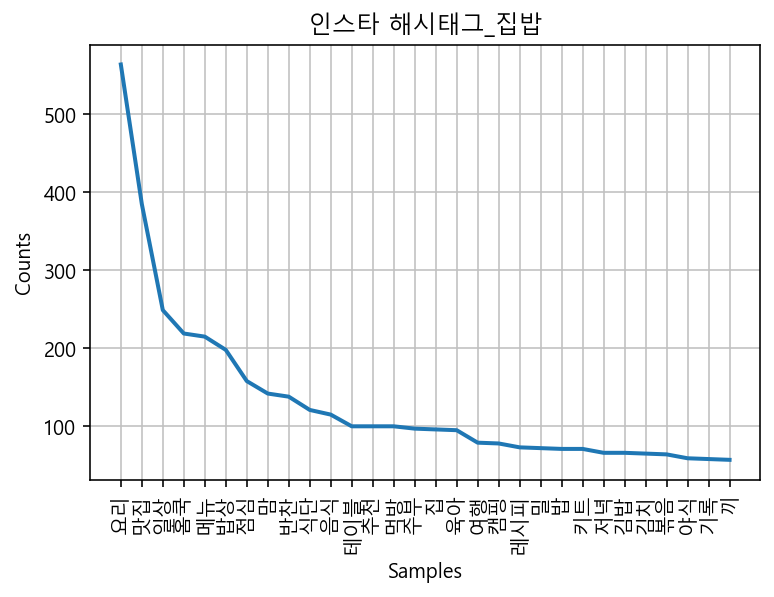

In [101]:
bab = nltk.Text(ex_list)
plt.figure()
plt.title('인스타 해시태그_집밥')
bab.plot(30)
plt.show()

### 워드클라우드

In [99]:
import wordcloud

#이미지 불러와서 사용할 것
from PIL import Image  

# 시각화시 글자 선명하게 출력하기 위함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

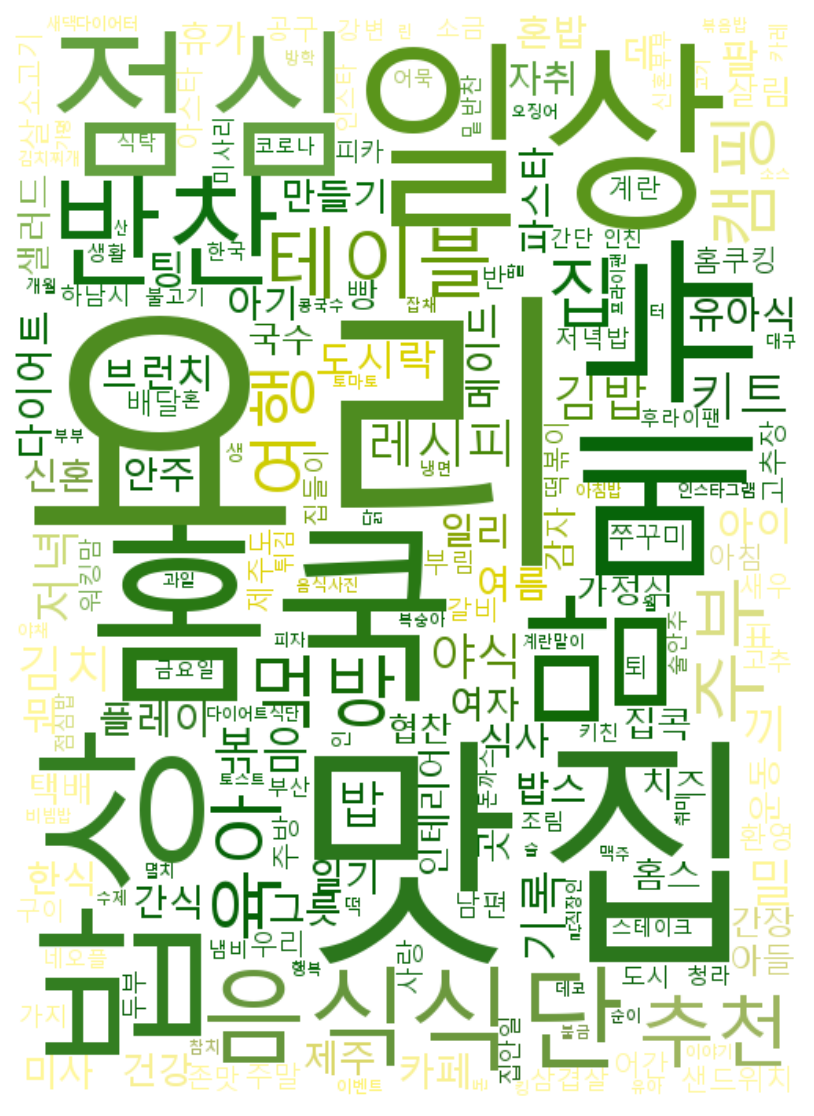

<Figure size 432x288 with 0 Axes>

In [100]:
# 특정이미지1 이용 워드클라우드 생성
img = np.array(Image.open('image/잘살아보세.png'))
image_color = wordcloud.ImageColorGenerator(img) #이미지의 color 이용
cloud_image = wordcloud.WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                                    background_color="white", mask=img).generate_from_frequencies(words)

plt.figure(figsize=(10, 10))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #축설정 off
plt.show()
plt.savefig("인스타_집밥_워드클라우드.png") #이미지 파일로 저장